<a href="https://colab.research.google.com/github/ladiaJeong/-01-classification/blob/master/%5B02%5D_EXPLORATION_GN5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### 당뇨병 환자 데이터와     다중 선형 회귀(Multi Regression Model)

### (1) 데이터 가져오기

In [ ]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

#sklearn.datasets의 load_diabetes에서 데이터를 가져옵니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_X=diabetes.data
df_y=diabetes.target
#diabetes의 data를 df_X에, target을 df_y에 저장합니다.

In [ ]:
print(df_X.shape)
print(df_y.shape)
# 쉐이프를 확인합니다.

(442, 10)
(442,)


In [ ]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


### (2) 모델에 입력할 데이터 X 준비하기

In [ ]:
X = np.array(df_x)
y = np.array(df_y)
print('굿')
#모델에 입력할 x값, 예측할 y값을 numpy array로 변환해 저장합니다.


굿


In [ ]:
print(X)
# 눈으로 확인해 보기위해 출력합니다

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [ ]:
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

### (4) train 데이터와 test 데이터로 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#X와 y 데이터를 각각 train 데이터와 test 데이터로 분리 합니다.

(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기

In [ ]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print("굿!")
#입력 데이터 개수 10에 맞는 가중치 W와 b를 준비합니다.


굿!


In [ ]:
W

array([0.71045271, 0.01486812, 0.1250667 , 0.38404472, 0.61519122,
       0.0573839 , 0.67811147, 0.29090573, 0.04566389, 0.09261599])

In [ ]:
b

0.4013288390019222

In [ ]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("굿!")
#모델 함수를 구현합니다.


굿!


### (6) 손실함수 loss 정의하기

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("굿!")
#손실함수를 MSE로 구현합니다.

굿!


In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("굿")
#손실함수 loss를 정의합니다.

굿


### (7) 기울기를 구하는 gradient 함수 구현하기

In [ ]:
def gradient(X, W, b, y):
  
    N = len(W)  # N은 가중치의 개수
    
   
    y_pred = model(X, W, b) # y_pred 준비
    
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)# 공식에 맞게 gradient 계산
        
    
    db = 2 * (y_pred - y).mean()# b의 gradient 계산
   
    return dW, db
print("굿!")
#기울기를 구하는 gradient 함수를 구현합니다.

굿!


In [ ]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
#경사(기울기)를 하나 계산해 봅니다.


dW: [ -60.6193753   -13.91558223 -189.78577454 -142.77971673  -68.40635795
  -56.16272079  127.88237072 -139.27083307 -183.08072972 -123.70802932]
db: -303.464310647788


### (8) 하이퍼 파라미터인 학습률 설정하기

In [ ]:
LEARNING_RATE = 0.001
#학습율을 설정해 줍니다.

### (9) 모델 학습하기

In [ ]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
#loss 값이 충분히 떨어질때까지 학습 시킵니다.         


Iteration 10 : Loss 2895.5589
Iteration 20 : Loss 2895.5581
Iteration 30 : Loss 2895.5572
Iteration 40 : Loss 2895.5564
Iteration 50 : Loss 2895.5556
Iteration 60 : Loss 2895.5548
Iteration 70 : Loss 2895.5540
Iteration 80 : Loss 2895.5531
Iteration 90 : Loss 2895.5523
Iteration 100 : Loss 2895.5515
Iteration 110 : Loss 2895.5507
Iteration 120 : Loss 2895.5499
Iteration 130 : Loss 2895.5490
Iteration 140 : Loss 2895.5482
Iteration 150 : Loss 2895.5474
Iteration 160 : Loss 2895.5466
Iteration 170 : Loss 2895.5458
Iteration 180 : Loss 2895.5449
Iteration 190 : Loss 2895.5441
Iteration 200 : Loss 2895.5433
Iteration 210 : Loss 2895.5425
Iteration 220 : Loss 2895.5417
Iteration 230 : Loss 2895.5409
Iteration 240 : Loss 2895.5400
Iteration 250 : Loss 2895.5392
Iteration 260 : Loss 2895.5384
Iteration 270 : Loss 2895.5376
Iteration 280 : Loss 2895.5368
Iteration 290 : Loss 2895.5359
Iteration 300 : Loss 2895.5351
Iteration 310 : Loss 2895.5343
Iteration 320 : Loss 2895.5335
Iteration 330 : L

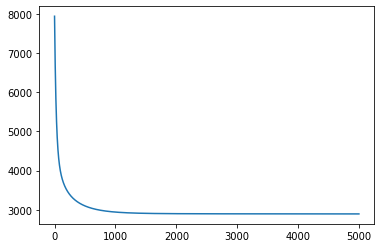

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse
#테스트 데이터 성능 확인하기 

6813.839452727727

### (11) 정답 데이터와 예측한 데이터 시각화하기

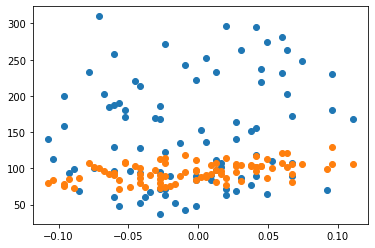

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()
#정답 데이터와 예측한 데이터 시각화하기

## 회고

### 1. 밑시딥 퍼셉트론에서 배웠던 가중치(W)와 편향(b)을 코드로 구현해서 학습해 볼 수 있어서 흥미로웠다.  

#### 레퍼런스
